<a href="https://colab.research.google.com/github/Golden028/PCVK/blob/main/Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1:

In [43]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt

# Step 2:

In [44]:
# Membuat list untuk menyimpan url dari beberapa image
urls = ["https://cdn.pixabay.com/photo/2016/04/16/23/07/cat-1333926_1280.jpg",
        "https://images.pexels.com/photos/617278/pexels-photo-617278.jpeg?cs=srgb&dl=animal-cute-eyes-617278.jpg&fm=jpg",
        "https://cdn.pixabay.com/photo/2014/11/30/14/11/cat-551554_640.jpg"]
# baca dan tampilkan image
# loop pada tiap url image, beberapa image dapat disimpan pada list
for url in urls:
  image = io.imread(url)                          #read image
  image = cv.resize(image, (0,0), fx=0.5, fy=0.5) #resize image to half size
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)  #convert color to RGB
  cv2_imshow(final_image)                         #show image
  print('\n')

HTTPError: HTTP Error 403: Forbidden

# Step 3

resolusi image: tinggi x lebar =  300  x  400


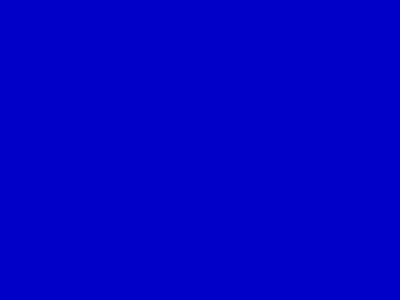

In [45]:
tinggi = image_2.shape[0]
lebar = image_2.shape[1]
print("resolusi image: tinggi x lebar = ",tinggi," x ",lebar)
cv2_imshow(image_2)

# Step 4

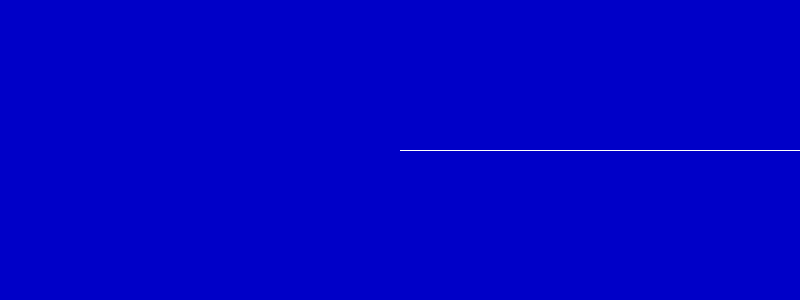

In [46]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

#membuat garis horizontal ditengah image
for y in range (lebar):
  image_3[int((tinggi)/2), y] = [255, 255, 255]

final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)

# **TASK**

1. Do the practical steps as above
2. Create vertical lines and diagonal lines in the output image

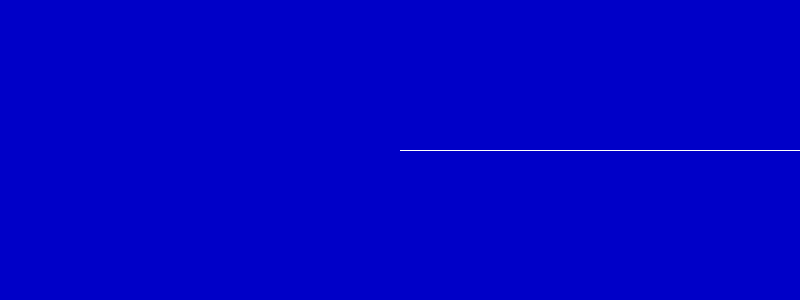

In [41]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

#membuat garis horizontal ditengah image
for y in range (lebar):
  image_3[int((tinggi)/2), y] = [255, 255, 255]

final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)

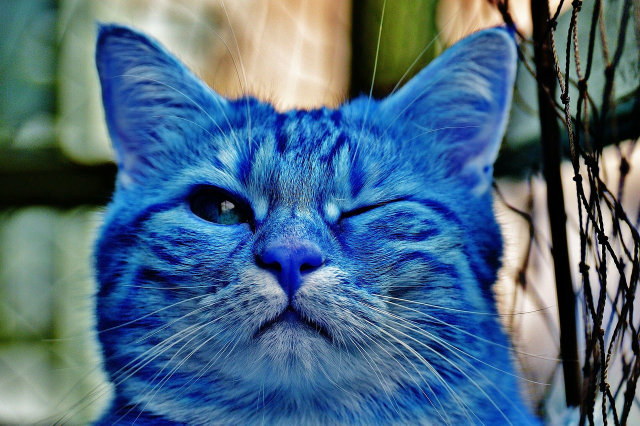

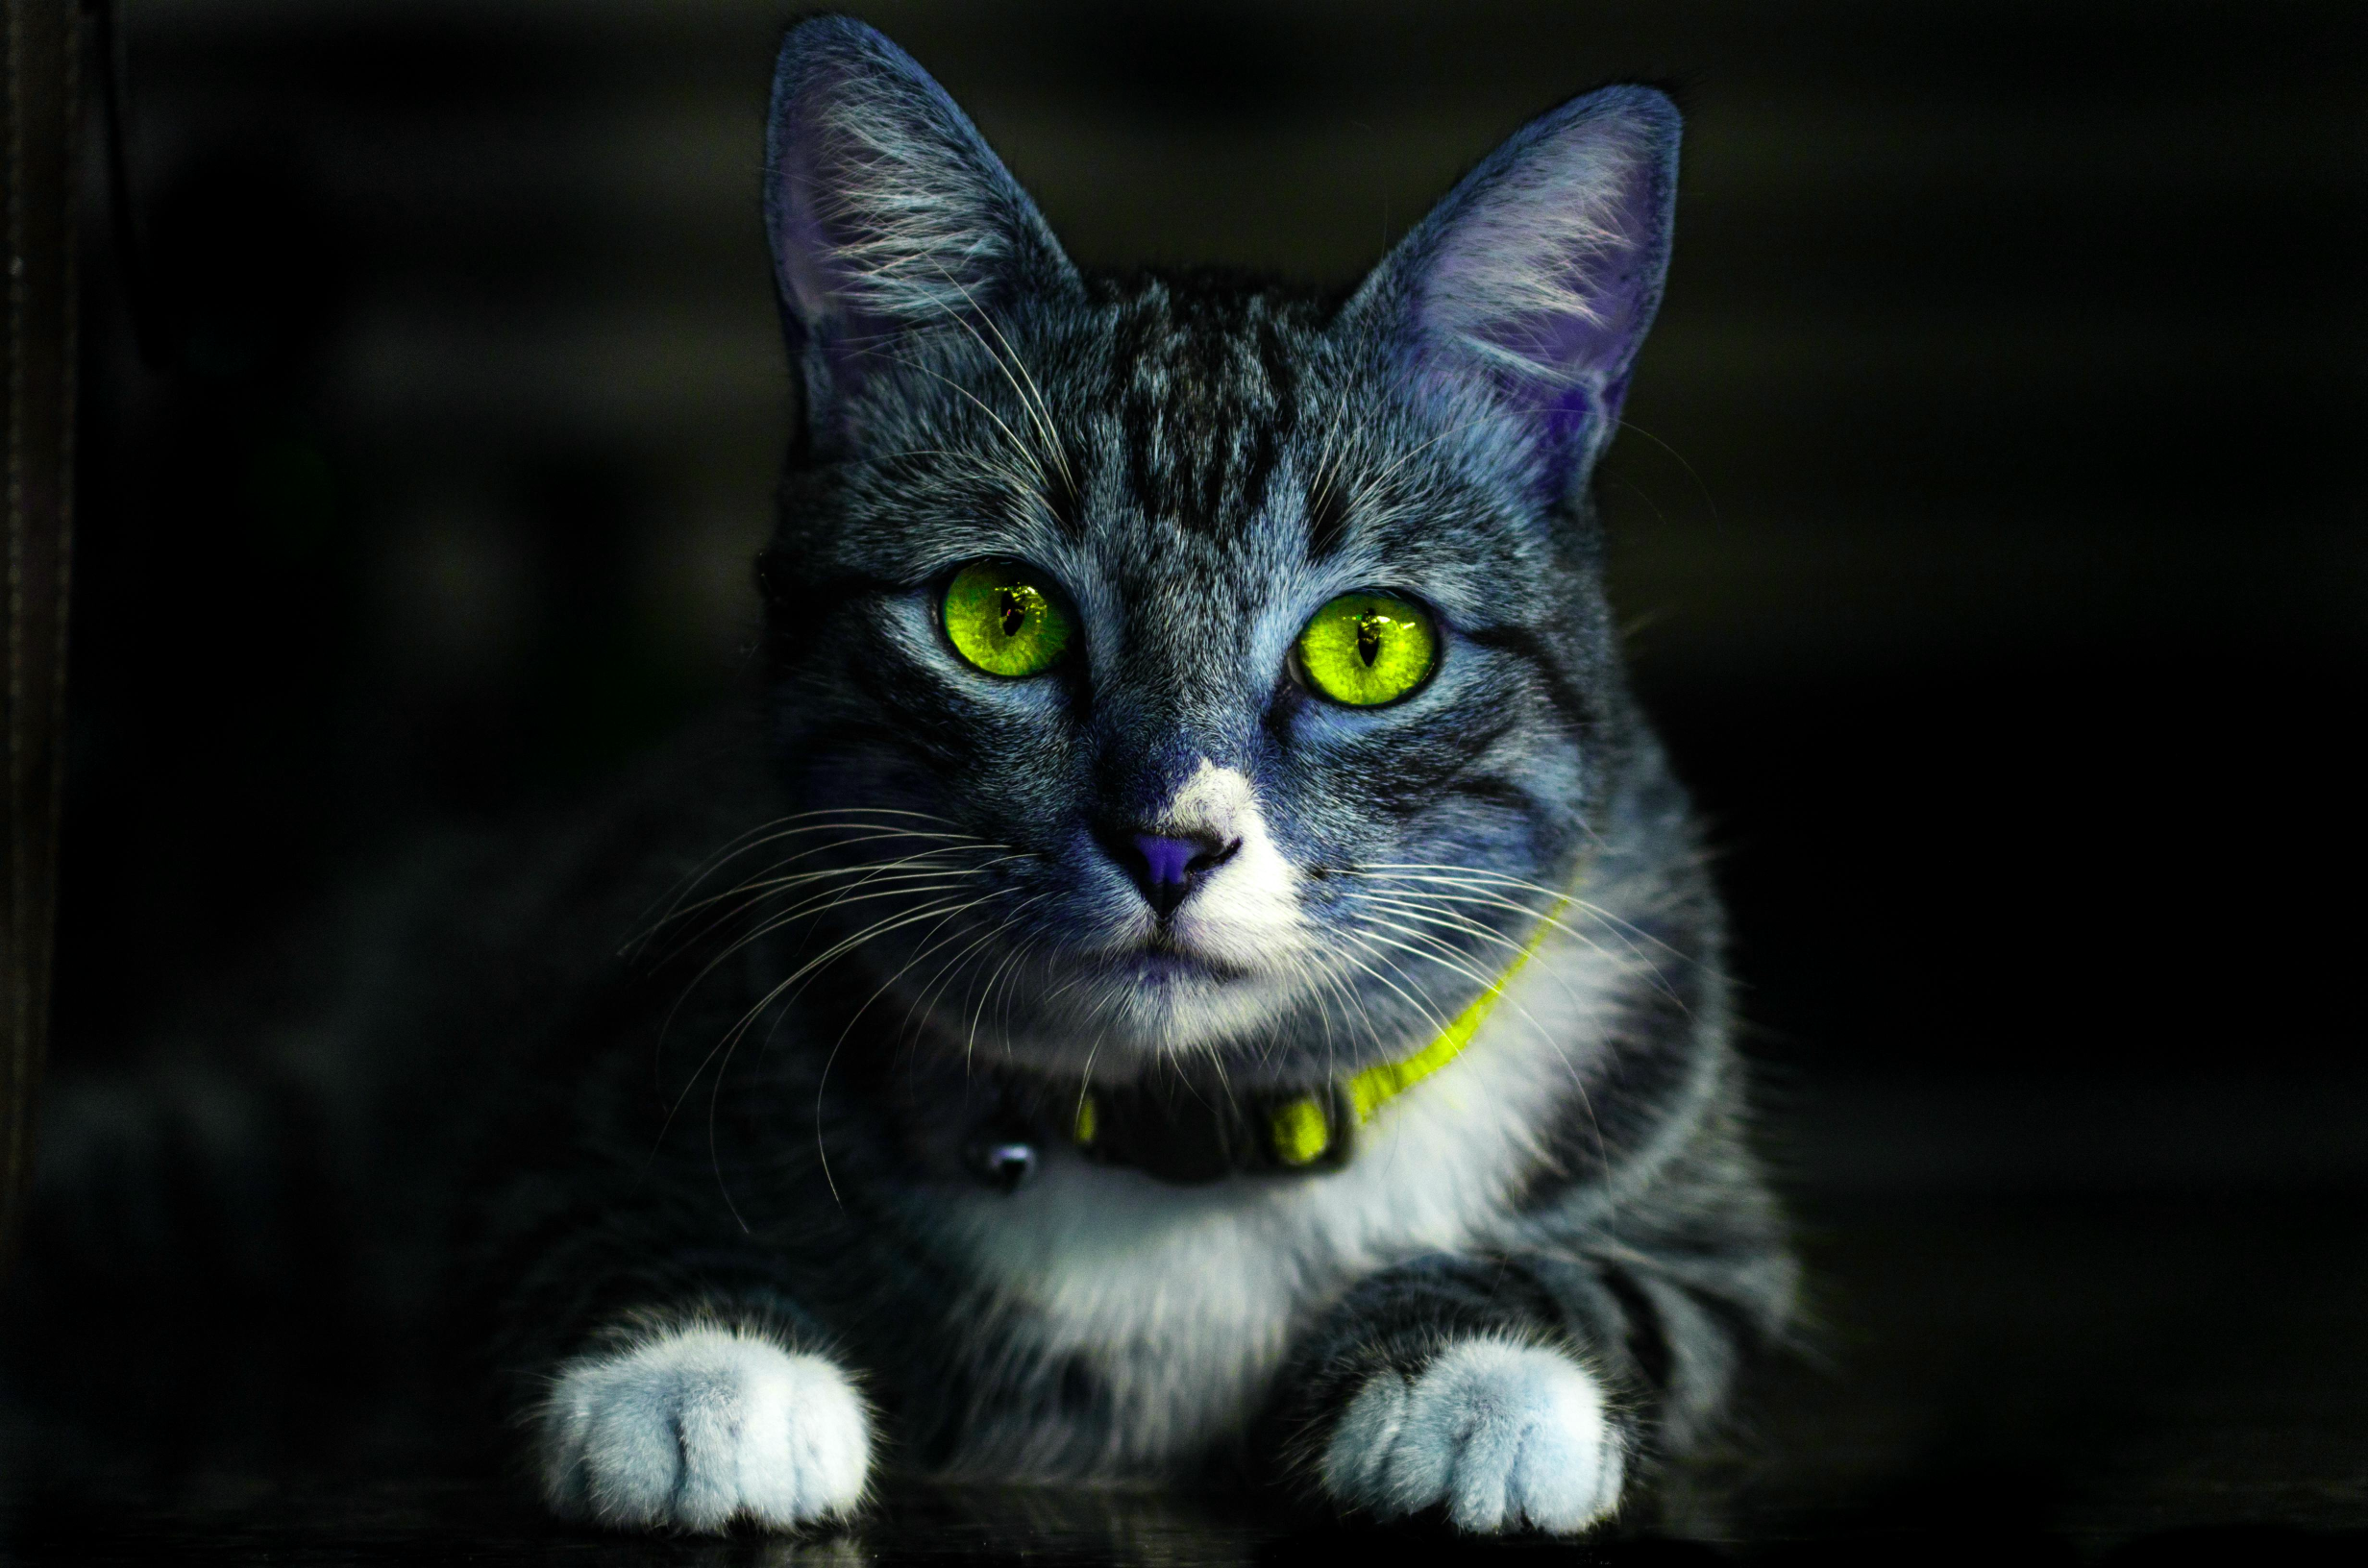

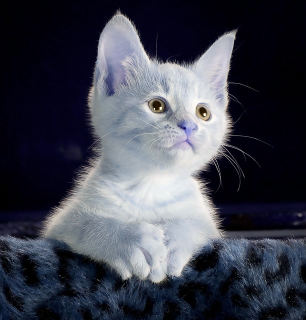

In [51]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import requests

# List of image URLs
urls = ["https://cdn.pixabay.com/photo/2016/04/16/23/07/cat-1333926_1280.jpg",
        "https://images.pexels.com/photos/617278/pexels-photo-617278.jpeg?cs=srgb&dl=animal-cute-eyes-617278.jpg&fm=jpg",
        "https://cdn.pixabay.com/photo/2014/11/30/14/11/cat-551554_640.jpg"]

# Define a User-Agent header to mimic a browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Loop through each URL
for url in urls:
    try:
        # Use requests to get the image content with the User-Agent header
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Raise an exception for bad status codes

        # Convert the content to a NumPy array
        image_bytes = np.frombuffer(response.content, np.uint8)

        # Decode the image data using OpenCV
        image = cv.imdecode(image_bytes, cv.IMREAD_COLOR)

        if image is None:
            print(f"Error: Could not decode image from {url}")
            continue

        # Process the image as before
        image_resized = cv.resize(image, (0, 0), fx=0.5, fy=0.5)

        # The image read by cv.imdecode is already in BGR format,
        # so we convert it to RGB for cv2_imshow
        final_image = cv.cvtColor(image_resized, cv.COLOR_BGR2RGB)

        # Display the image
        cv2_imshow(final_image)
        print('\n')

    except requests.exceptions.RequestException as e:
        print(f"Error accessing {url}: {e}")